In [201]:
from sklearn.feature_selection import VarianceThreshold

In [202]:
sel = VarianceThreshold()

In [203]:
dataset = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
dataset

[[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]

In [204]:
sel.fit_transform(dataset)

array([[2, 0],
       [1, 4],
       [1, 1]])

In [205]:
sel60 = VarianceThreshold(threshold=(0.9 * (1 - 0.1)))

In [206]:
sel60.fit_transform(dataset)

array([[0],
       [4],
       [1]])

In [207]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import numpy as np 
import pandas

In [208]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")

In [209]:
def removeColumns(pandasArray, *column):
    return pandasArray.drop(pandasArray.columns[[column]], axis=1).values

In [210]:
X = removeColumns(my_data, 0, 1)

In [211]:
def target(numpyArray, targetColumnIndex):
    target_dict = dict()
    target = list()
    count = -1
    for i in range(len(my_data.values)):
        if my_data.values[i][targetColumnIndex] not in target_dict:
            count += 1
            target_dict[my_data.values[i][targetColumnIndex]] = count
        target.append(target_dict[my_data.values[i][targetColumnIndex]])
    return np.asarray(target)

In [212]:
y = target(my_data, 1)

In [231]:
X.shape


(150, 4)

In [228]:
X_new = SelectKBest(chi2, k=4).fit_transform(X, y)

In [229]:
X_new.shape

(150, 4)

In [216]:
from sklearn.feature_extraction import DictVectorizer

In [217]:
dataset = [
...     {'Day': 'Monday', 'Temperature': 18},
...     {'Day': 'Tuesday', 'Temperature': 13},
...     {'Day': 'Wednesday', 'Temperature': 7},
... ]

In [218]:
vec = DictVectorizer()

In [219]:
vec.fit_transform(dataset).toarray()

array([[  1.,   0.,   0.,  18.],
       [  0.,   1.,   0.,  13.],
       [  0.,   0.,   1.,   7.]])

In [220]:
vec.get_feature_names()

['Day=Monday', 'Day=Tuesday', 'Day=Wednesday', 'Temperature']

In [221]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
%matplotlib inline

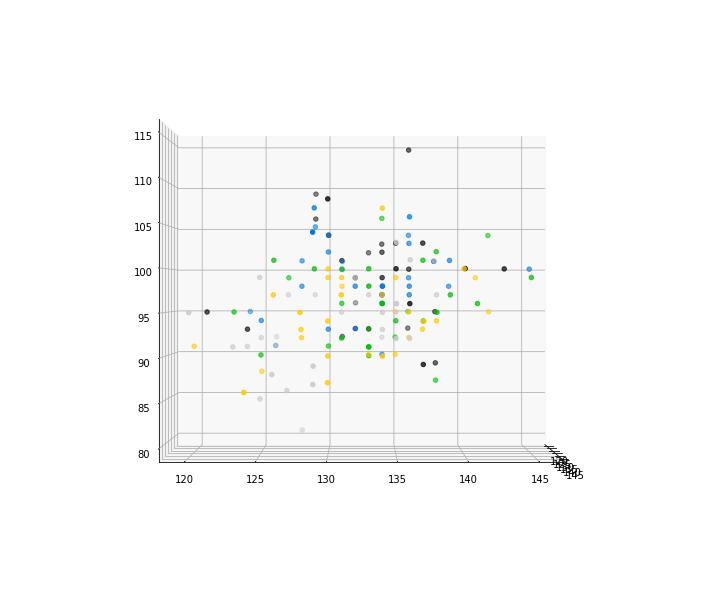

In [222]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=plt.cm.spectral)

In [223]:
pca = decomposition.PCA(n_components=2)

In [224]:
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [225]:
PCA_X = pca.transform(X_new)

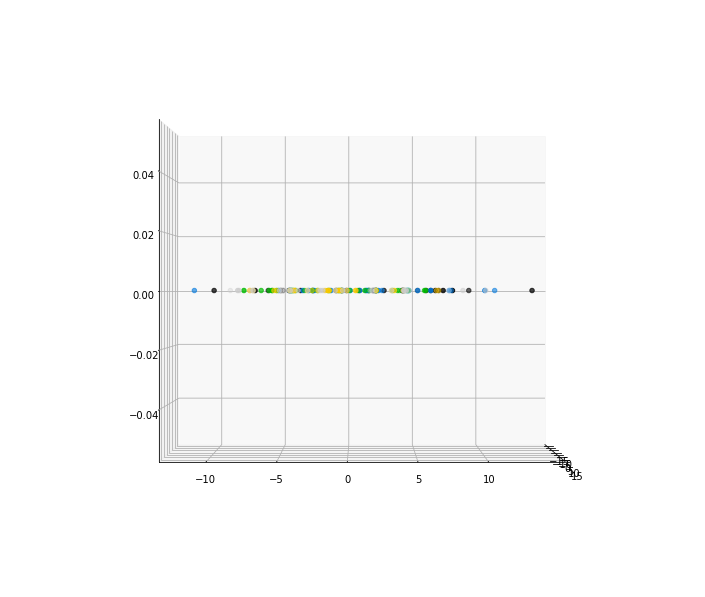

In [226]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=0)
ax.scatter(PCA_X[:, 0], PCA_X[:, 1], c=y, cmap=plt.cm.spectral)

In [227]:
PCA_X.shape

(150, 2)